## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

In [1]:
! git clone https://www.github.com/ds4e/clustering



Cloning into 'clustering'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 3), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 4.21 MiB | 9.91 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [2]:
# 1

import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)


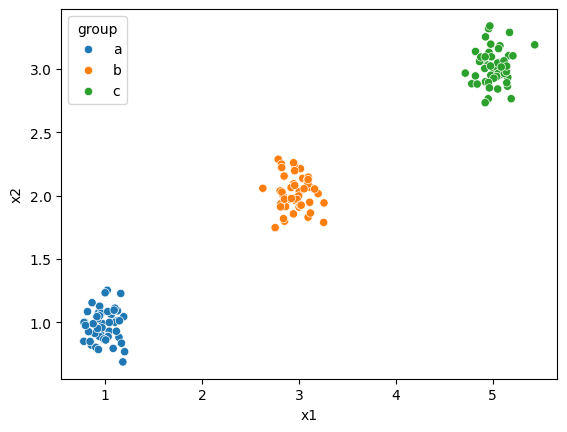

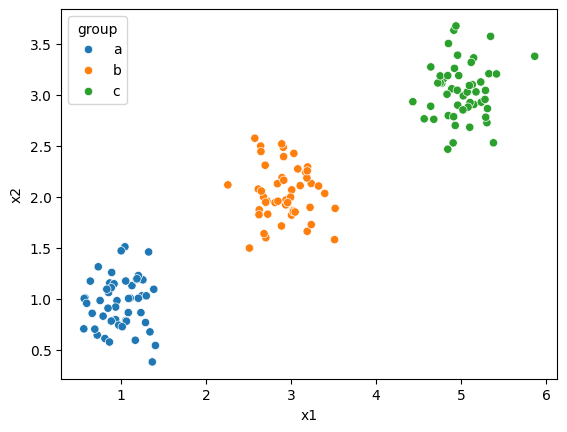

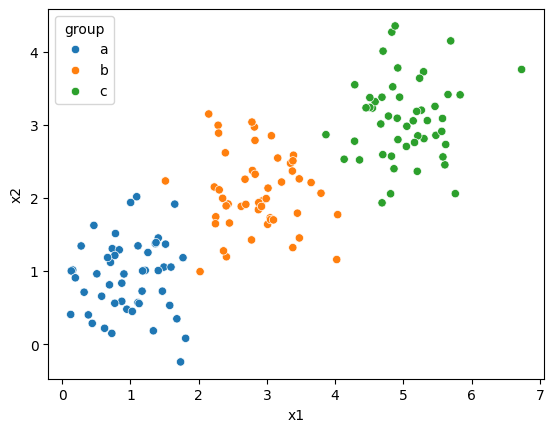

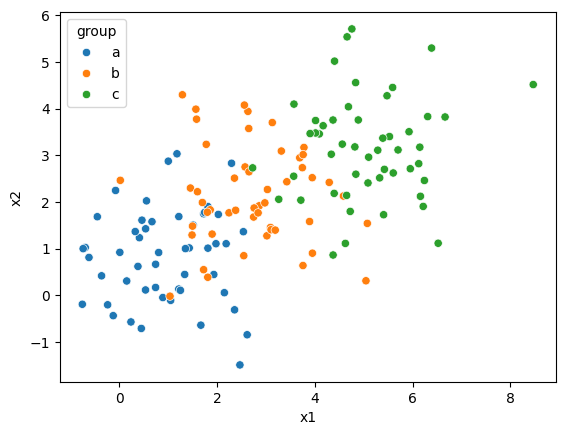

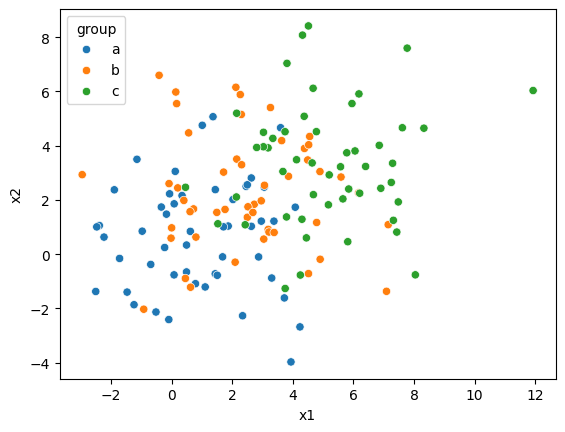

In [3]:
# 2
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df0_125,x='x1',y='x2',hue='group')
plt.show()

sns.scatterplot(data=df0_25,x='x1',y='x2',hue='group')
plt.show()

sns.scatterplot(data=df0_5,x='x1',y='x2',hue='group')
plt.show()

sns.scatterplot(data=df1_0,x='x1',y='x2',hue='group')
plt.show()

sns.scatterplot(data=df2_0,x='x1',y='x2',hue='group')

plt.show()


# As the noise goes up, the different groups become lets visually distinct from each other
# They start to over lap a lot

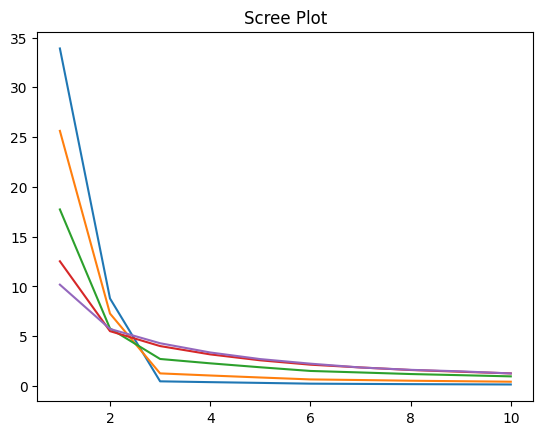

In [4]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x



# df0_125
# df0_25
# df0_5
# df1_0
# df2_0

df_list = [df0_125,df0_25,df0_5,df1_0,df2_0]

for a in df_list:
  X = a[['x1','x2']]
  X = X.apply(maxmin,axis=0)
  # Create a scree plot:
  k_bar = 10
  SSE = [] # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
      model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
      model = model.fit(X) # Fit the model
      SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

  scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot




# As the noise increases, the Scree plot starts a lower position and decreases less.
# Thus the elbow is decreasing as the noise increases.
# In terms of picking the k, as noise increases, it makes it harder to chose k
# and at a certain point you'd just have to change the data because it doesn't make sense to cluster


### 4. Explain the intuition of the elbow, using this numerical simulation as an example.

The elbow is essentially a drop off in SSE which helps people chose what k to use. However, when there aren't really any discrete clusters (or they don't show in the data), the elbow might disapear. The numerical simulation shows this as when the noise increases (less discrete clusters), then the elbow starts to disapear.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [23]:
# 1
df = pd.read_csv('/content/clustering/assignment/data/2022 election cycle fundraising.csv')
df.head()

index              Member       Party       State Chamber       Raised  \
0      0  Abigail Spanberger  Democratic    Virginia   House   $7,719,396   
1      1      Adam Kinzinger  Republican    Illinois   House   $2,192,741   
2      2         Adam Schiff  Democratic  California   House  $20,993,041   
3      3          Adam Smith  Democratic  Washington   House   $1,211,111   
4      4        Adrian Smith  Republican    Nebraska   House   $1,617,611   

         Spent Cash on Hand Debts  
0   $7,449,678     $851,851    $0  
1   $1,243,502   $2,472,888    $0  
2  $13,957,854  $20,942,888    $0  
3   $1,173,466     $623,472    $0  
4   $1,664,674   $1,098,579    $0

In [24]:
df.dtypes

# I have to clean up he dollar values. I will do this by removing the commas and dollar sign
# Then I will convert it to a numeric value (in this case int)
toClean = ['Raised','Spent','Cash on Hand','Debts']

for i in toClean:
  df[i] = df[i].astype(str).str.replace(',', '')
  df[i] = df[i].str.replace('$', '')
  df[i] = pd.to_numeric(df[i])


print(df.dtypes)

df.head()


index            int64
Member          object
Party           object
State           object
Chamber         object
Raised           int64
Spent            int64
Cash on Hand     int64
Debts            int64
dtype: object


index              Member       Party       State Chamber    Raised  \
0      0  Abigail Spanberger  Democratic    Virginia   House   7719396   
1      1      Adam Kinzinger  Republican    Illinois   House   2192741   
2      2         Adam Schiff  Democratic  California   House  20993041   
3      3          Adam Smith  Democratic  Washington   House   1211111   
4      4        Adrian Smith  Republican    Nebraska   House   1617611   

      Spent  Cash on Hand  Debts  
0   7449678        851851      0  
1   1243502       2472888      0  
2  13957854      20942888      0  
3   1173466        623472      0  
4   1664674       1098579      0

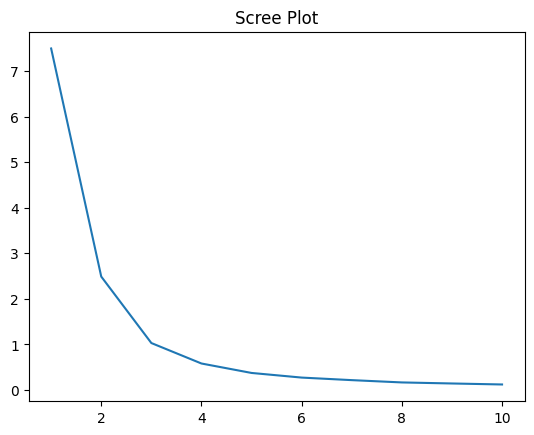

In [25]:
# 2

X = df[['Raised','Spent']]

X = X.apply(maxmin,axis=0)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
  model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
  model = model.fit(X) # Fit the model
  SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

plt.show()
# Based on this plot, I would go with K = 4 because after this point, it flattens out



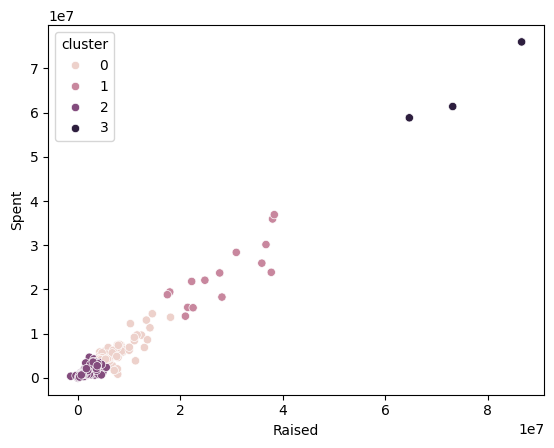

     index             Member       Party           State Chamber   Raised  \
1        1     Adam Kinzinger  Republican        Illinois   House  2192741   
3        3         Adam Smith  Democratic      Washington   House  1211111   
4        4       Adrian Smith  Republican        Nebraska   House  1617611   
5        5  Adriano Espaillat  Democratic        New York   House  1178693   
6        6           Al Green  Democratic           Texas   House   346571   
..     ...                ...         ...             ...     ...      ...   
531    531    Warren Davidson  Republican            Ohio   House   871656   
532    532    William Timmons  Republican  South Carolina   House   892064   
534    534      Yvette Clarke  Democratic        New York   House   684268   
535    535     Yvette Herrell  Republican      New Mexico   House  3777731   
536    536        Zoe Lofgren  Democratic      California   House  1679466   

       Spent  Cash on Hand   Debts  cluster  
1    1243502     

index           Member       Party    State Chamber    Raised     Spent  \
340    340       Mark Kelly  Democratic  Arizona  Senate  73140886  61357281   
417    417  Raphael Warnock  Democratic  Georgia  Senate  86581469  75959810   
523    523      Val Demings  Democratic  Florida   House  64682883  58806664   

     Cash on Hand  Debts  cluster  
340      13186127      0        3  
417      22762985      0        3  
523       6647641      0        3

In [26]:
model = KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=0)
model = model.fit(X)
df['cluster'] = model.labels_

sns.scatterplot(data=df, x='Raised', y='Spent', hue='cluster')
plt.show()

print(df[df['cluster'] == 2])
df[df['cluster'] == 3]

#The third cluster is made up of all Democrats. Both Warnock and Kelley ran in
# states where they flipped their seat from Republican do Democrat.
# These were considered highly contested and important seats

# The second cluster seems like most of them won their race based on the list the code gave me





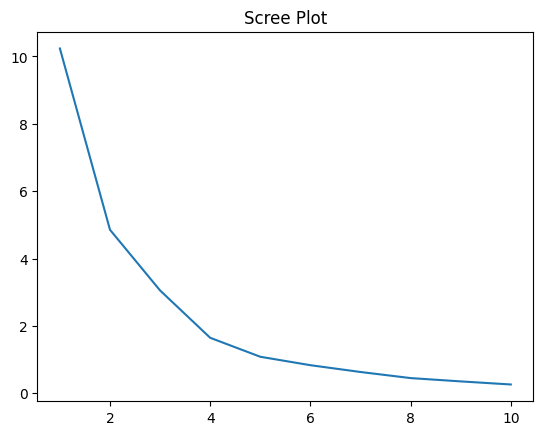

In [27]:
# 3

X = df[['Cash on Hand','Debts']]

X = X.apply(maxmin,axis=0)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
  model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
  model = model.fit(X) # Fit the model
  SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

plt.show()
# Based on this plot, I would go with K = 4 because after this point, it flattens out



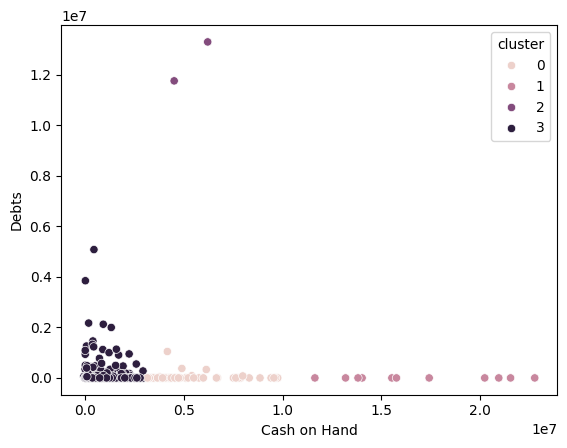

     index       Member       Party      State Chamber    Raised     Spent  \
133    133  David Trone  Democratic   Maryland   House  12990741   6878050   
442    442  Ron Johnson  Republican  Wisconsin  Senate  27680901  23731653   

     Cash on Hand     Debts  cluster  
133       6206371  13302000        2  
442       4508581  11759857        2  


index               Member       Party           State Chamber    Raised  \
2        2          Adam Schiff  Democratic      California   House  20993041   
89      89        Chuck Schumer  Democratic        New York  Senate  35899966   
261    261         John Kennedy  Republican       Louisiana  Senate  28119082   
267    267           John Thune  Republican    South Dakota  Senate   6770674   
274    274      Josh Gottheimer  Democratic      New Jersey   House   7720264   
290    290         Katie Porter  Democratic      California   House  21441693   
310    310       Lindsey Graham  Republican  South Carolina  Senate   6695582   
340    340           Mark Kelly  Democratic         Arizona  Senate  73140886   
412    412  Raja Krishnamoorthi  Democratic        Illinois   House   7843935   
417    417      Raphael Warnock  Democratic         Georgia  Senate  86581469   
500    500            Tim Scott  Republican  South Carolina  Senate  37743256   

        Spent  Cash on Hand  Debts  cluster  
2    13957854      20942888      0        1  
89   25944350      20231213      0        1  
261  18276565      15530074      0        1  
267   2763217      17419927      0        1  
274   2045198      14024163      0        1  
290  15946876      15762568      0        1  
310   5371524      13815515      0        1  
340  61357281      13186127      0        1  
412   4638387      11633394      0        1  
417  75959810      22762985      0        1  
500  23876921      21539824      0        1

In [28]:
model = KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=0)
model = model.fit(X)
df['cluster'] = model.labels_

sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='cluster')
plt.show()

print(df[df['cluster'] == 2])
df[df['cluster'] == 1]



# Unlike the previous parts there doesn't seem to be much of a relationship between debts and cash on hand. And it doesn't lineraly increase.
# This might be because there is less variation in debts as all of the debts seem to be pretty similar other than cluster 2.

# Cluster 2 has the highest debts which is interesting because one of them, Ron Johnson ran in a really close race.
# He probably had to spend more money then he was expecting because it was tighter then he imagined.


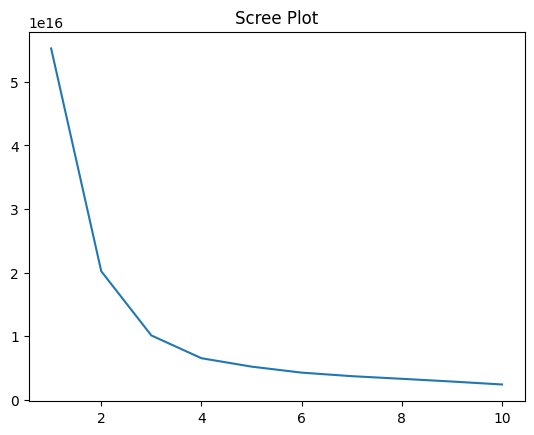

In [36]:
# 4

X = df[['Raised', 'Spent', 'Cash on Hand','Debts']]


# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
  model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
  model = model.fit(X) # Fit the model
  SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

plt.show()

# The K should be at 4


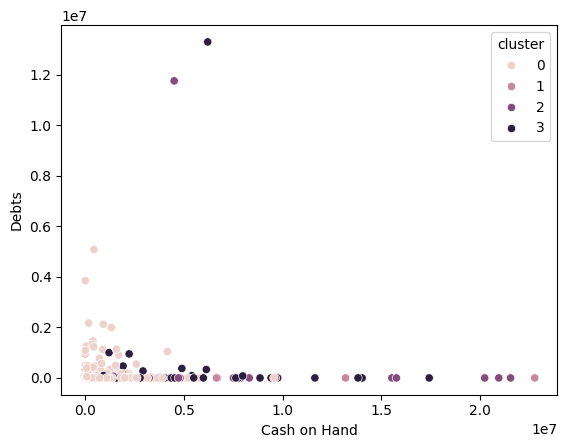

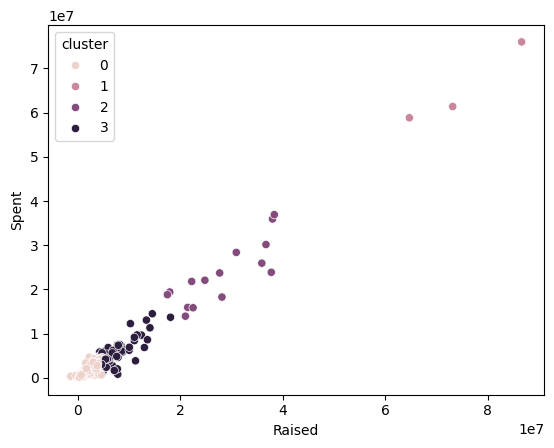

     index                  Member       Party           State Chamber  \
2        2             Adam Schiff  Democratic      California   House   
87      87  Catherine Cortez Masto  Democratic          Nevada  Senate   
89      89           Chuck Schumer  Democratic        New York  Senate   
261    261            John Kennedy  Republican       Louisiana  Senate   
290    290            Katie Porter  Democratic      California   House   
298    298          Kevin McCarthy  Republican      California   House   
326    326           Maggie Hassan  Democratic   New Hampshire  Senate   
328    328             Marco Rubio  Republican         Florida  Senate   
390    390            Nancy Pelosi  Democratic      California   House   
414    414               Rand Paul  Republican        Kentucky  Senate   
442    442             Ron Johnson  Republican       Wisconsin  Senate   
476    476           Steve Scalise  Republican       Louisiana   House   
490    490                Ted Cruz  Re

index           Member       Party    State Chamber    Raised     Spent  \
340    340       Mark Kelly  Democratic  Arizona  Senate  73140886  61357281   
417    417  Raphael Warnock  Democratic  Georgia  Senate  86581469  75959810   
523    523      Val Demings  Democratic  Florida   House  64682883  58806664   

     Cash on Hand  Debts  cluster  
340      13186127      0        1  
417      22762985      0        1  
523       6647641      0        1

In [37]:
model = KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=0)
model = model.fit(X)
df['cluster'] = model.labels_

sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='cluster')
plt.show()

sns.scatterplot(data=df, x='Raised', y='Spent', hue='cluster')
plt.show()

print(df[df['cluster'] == 2])
df[df['cluster'] == 1]

# The clusters are more similar to the Raise/Spent k means graph then the Cash On Hand/Debts k means graph.
# This can be seen as comparing each graph to their previous counter part.
# The Raise/Spent looks very similar while, the Cash On Hand/Debts looks nothing alike
# Mark Kelly, Raphael Warnock, and Val Demings are all in the same cluster again for example

5. Did the k-MC algorithm find useful patterns for you in analyzing the election?

It helped show that the closer elections caused more money to be spent. Especially ones that are on the national spotlight (like Warnock). So, closer elections leads to more donating because people feel like they can more of an impact. Also, the people running in close races are more likely to take on debt because they feel like taking on a debt could be the difference between winning and losing.


**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?